# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'faster_R_CNN' 
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [27]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

'Tensorflow/workspace/models/faster_R_CNN/train'

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir -p {path}

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [7]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash

  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1663034 sha256=9a168656035754d063a84423fbae9c6fd01a3ff6201f52d53225917693b4cb59
  Stored in directory: /tmp/pip-ephem-wheel-cache-ft1xl4vd/wheels/04/2c/c5/d3355928743d6abd39f508940151a780406faf08e5ec4985e6
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


You should consider upgrading via the '/home/chanyu/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.


In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner): 0.02s
I1218 11:30:51.852107 139725484791616 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner): 0.02s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul): 0.08s
I1218 11:30:51.930984 139725484791616 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul): 0.08s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
INFO:tensorflow:time(__main__.Mod

I1218 11:30:54.401736 139725484791616 efficientnet_model.py:143] round_filter input=80 output=80
I1218 11:30:54.401863 139725484791616 efficientnet_model.py:143] round_filter input=112 output=112
I1218 11:30:54.663117 139725484791616 efficientnet_model.py:143] round_filter input=112 output=112
I1218 11:30:54.663221 139725484791616 efficientnet_model.py:143] round_filter input=192 output=192
I1218 11:30:54.957635 139725484791616 efficientnet_model.py:143] round_filter input=192 output=192
I1218 11:30:54.957759 139725484791616 efficientnet_model.py:143] round_filter input=320 output=320
I1218 11:30:55.083816 139725484791616 efficientnet_model.py:143] round_filter input=1280 output=1280
I1218 11:30:55.104792 139725484791616 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.0, depth_coefficient=1.1, resolution=240, dropout_rate=0.2, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=

I1218 11:30:58.390800 139725484791616 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.2, depth_coefficient=1.4, resolution=300, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_re

I1218 11:31:03.149020 139725484791616 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b6
I1218 11:31:03.149127 139725484791616 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 384
I1218 11:31:03.149163 139725484791616 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 8
I1218 11:31:03.150497 139725484791616 efficientnet_model.py:143] round_filter input=32 output=56
I1218 11:31:03.168029 139725484791616 efficientnet_model.py:143] round_filter input=32 output=56
I1218 11:31:03.168190 139725484791616 efficientnet_model.py:143] round_filter input=16 output=32
I1218 11:31:03.313666 139725484791616 efficientnet_model.py:143] round_filter input=16 output=32
I1218 11:31:03.313788 139725484791616 efficientnet_model.py:143] round_filter input=24 output=40
I1218 11:31:03.683533 139725484791616 efficientnet_model.py:143] round_filter input=24 output=40
I1218 11:31:03.683646 13

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor): 0.0s
I1218 11:31:09.740715 139725484791616 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor
[ RUN      ] ModelBuilderTF2Test.test_unknown_meta_architecture
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_meta_architecture): 0.0s
I1218 11:31:09.740936 139725484791616 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_unknown_meta_architecture): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown_meta_architecture
[ RUN      ] ModelBuilderTF2Test.test_unknown_ssd_feature_extractor
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_ssd_feature_extractor): 0.0s
I1218 11:31:09.741613 139725484791616 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_unknown_ssd_feature_extractor): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown

In [ ]:
# !pip install tensorflow --upgrade

In [ ]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2

In [9]:
import object_detection
## if error
# pip install tensorflow-object-detection-api 

In [10]:
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2022-12-18 11:31:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.163.48, 2404:6800:4012:4::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.163.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  7.49MB/s    in 28s     

2022-12-18 11:31:46 (7.21 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information avai

In [25]:
paths['PRETRAINED_MODEL_PATH']

'Tensorflow/workspace/pre-trained-models'

# 2. Create Label Map

In [ ]:
#labels = [{'name':'wc', 'id':1}, {'name':'show', 'id':2}, {'name':'sister', 'id':3}]


In [11]:
labels = [{'name':'wc', 'id':1}, {'name':'show', 'id':2}, {'name':'sister', 'id':3}, 
         {'name':'zero', 'id':4}, {'name':'no', 'id':5}, {'name':'ok', 'id':6} ]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
# files['LABELMAP']

# 3. Create TF records

In [12]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [13]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [14]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required

# 4. Copy Model Config to Training Folder

In [15]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


# 5. Update Config For Transfer Learning

In [16]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2022-12-18 11:33:22.131042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 11:33:23.761433: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/home/chanyu/anaconda3/lib/
2022-12-18 11:33:23.761481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/home/chanyu/anaconda3/lib/
2022-12-18 11:33:23.761486: W 

In [22]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
# version proplem

In [22]:
# files['PIPELINE_CONFIG']

In [23]:
config

{'model': ssd {
   num_classes: 6
 },
 'train_config': batch_size: 3
 data_augmentation_options {
   random_horizontal_flip {
   }
 }
 sync_replicas: true
 optimizer {
   momentum_optimizer {
     learning_rate {
       cosine_decay_learning_rate {
         learning_rate_base: 0.03999999910593033
         total_steps: 25000
         warmup_learning_rate: 0.013333000242710114
         warmup_steps: 2000
       }
     }
     momentum_optimizer_value: 0.8999999761581421
   }
   use_moving_average: false
 }
 fine_tune_checkpoint: "Tensorflow/workspace/pre-trained-models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0"
 num_steps: 25000
 startup_delay_steps: 0.0
 replicas_to_aggregate: 8
 max_number_of_boxes: 100
 unpad_groundtruth_tensors: false
 fine_tune_checkpoint_type: "detection"
 use_bfloat16: true
 fine_tune_checkpoint_version: V2,
 'train_input_config': label_map_path: "Tensorflow/workspace/annotations/label_map.pbtxt"
 tf_record_input_reader {
   input_path: "Tensor

In [19]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [20]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [26]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [26]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_final --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_final/pipeline.config --num_train_steps=3500


In [25]:
# turn on gpu 
!sudo nvidia-smi -pm 1

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
[sudo] password for chanyu: 


In [ ]:
# !pip install IPython

In [30]:
!{command}

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
W1215 12:42:14.602770 140047479187264 deprecation.py:350] From /home/chanyu/.pyenv/versions/3.8.10/lib/python3.8/site-packages/tensorflow/python/autograph/pyct/static_analysis/liveness.py:83: Analyzer.lamba_check (from tensorflow.python.autograph.pyct.static_analysis.liveness) is deprecated and will be removed after 2023-09-23.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W1215 12:42:19.746827 140047479187264 deprecation.py:350] From /home/chanyu/.pyenv/versions/3.8.10/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1176: s

INFO:tensorflow:Step 100 per-step time 0.295s
I1215 12:43:11.823120 140047479187264 model_lib_v2.py:705] Step 100 per-step time 0.295s
INFO:tensorflow:{'Loss/classification_loss': 0.33900025,
 'Loss/localization_loss': 0.3823287,
 'Loss/regularization_loss': 0.15408137,
 'Loss/total_loss': 0.8754103,
 'learning_rate': 0.0319994}
I1215 12:43:11.823765 140047479187264 model_lib_v2.py:708] {'Loss/classification_loss': 0.33900025,
 'Loss/localization_loss': 0.3823287,
 'Loss/regularization_loss': 0.15408137,
 'Loss/total_loss': 0.8754103,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 0.062s
I1215 12:43:17.933984 140047479187264 model_lib_v2.py:705] Step 200 per-step time 0.062s
INFO:tensorflow:{'Loss/classification_loss': 0.26965398,
 'Loss/localization_loss': 0.23709537,
 'Loss/regularization_loss': 0.1542914,
 'Loss/total_loss': 0.6610407,
 'learning_rate': 0.0373328}
I1215 12:43:17.934365 140047479187264 model_lib_v2.py:708] {'Loss/classification_loss': 0.26965398,

INFO:tensorflow:Step 1600 per-step time 0.057s
I1215 12:44:40.608823 140047479187264 model_lib_v2.py:705] Step 1600 per-step time 0.057s
INFO:tensorflow:{'Loss/classification_loss': 0.13971226,
 'Loss/localization_loss': 0.112244256,
 'Loss/regularization_loss': 0.15159434,
 'Loss/total_loss': 0.40355086,
 'learning_rate': 0.079970405}
I1215 12:44:40.609127 140047479187264 model_lib_v2.py:708] {'Loss/classification_loss': 0.13971226,
 'Loss/localization_loss': 0.112244256,
 'Loss/regularization_loss': 0.15159434,
 'Loss/total_loss': 0.40355086,
 'learning_rate': 0.079970405}
INFO:tensorflow:Step 1700 per-step time 0.060s
I1215 12:44:46.565011 140047479187264 model_lib_v2.py:705] Step 1700 per-step time 0.060s
INFO:tensorflow:{'Loss/classification_loss': 0.15164189,
 'Loss/localization_loss': 0.04711648,
 'Loss/regularization_loss': 0.15132397,
 'Loss/total_loss': 0.35008234,
 'learning_rate': 0.07995972}
I1215 12:44:46.565448 140047479187264 model_lib_v2.py:708] {'Loss/classification_l

INFO:tensorflow:Step 3100 per-step time 0.063s
I1215 12:46:09.807722 140047479187264 model_lib_v2.py:705] Step 3100 per-step time 0.063s
INFO:tensorflow:{'Loss/classification_loss': 0.08662943,
 'Loss/localization_loss': 0.024835972,
 'Loss/regularization_loss': 0.14398876,
 'Loss/total_loss': 0.25545415,
 'learning_rate': 0.07963799}
I1215 12:46:09.807995 140047479187264 model_lib_v2.py:708] {'Loss/classification_loss': 0.08662943,
 'Loss/localization_loss': 0.024835972,
 'Loss/regularization_loss': 0.14398876,
 'Loss/total_loss': 0.25545415,
 'learning_rate': 0.07963799}
INFO:tensorflow:Step 3200 per-step time 0.060s
I1215 12:46:15.857155 140047479187264 model_lib_v2.py:705] Step 3200 per-step time 0.060s
INFO:tensorflow:{'Loss/classification_loss': 0.05413112,
 'Loss/localization_loss': 0.023973187,
 'Loss/regularization_loss': 0.1434702,
 'Loss/total_loss': 0.22157452,
 'learning_rate': 0.07960275}
I1215 12:46:15.857562 140047479187264 model_lib_v2.py:708] {'Loss/classification_los

# 7. Evaluate the Model

In [ ]:
!sudo apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.3

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command} # fix me

# Tensorboard

In [ ]:
!cd {os.path.join(paths['CHECKPOINT_PATH'], 'train')} && tensorboard --logdir=.

![tensorboard](./tensorboard.csv)

# 8. Load Train Model From Checkpoint

In [ ]:
!pip install tf_slim

In [31]:
# 
import os
import tensorflow as tf

In [32]:
from object_detection.utils import label_map_util

In [33]:
from object_detection.utils import visualization_utils as viz_utils

In [34]:
from object_detection.builders import model_builder # fix me

/home/chanyu/Desktop/gesture_detection_3.8/tfod/lib/python3.8/site-packages/tensorflow_addons-0.18.0-py3.8-linux-x86_64.egg/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
# import object_detection.builders

In [ ]:
# !pip install nets

In [35]:
from object_detection.utils import config_util

In [ ]:
paths['CHECKPOINT_PATH']

In [43]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [37]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [39]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'show_37.jpg')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2022-12-15 12:47:02.329718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2022-12-15 12:47:02.696674: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


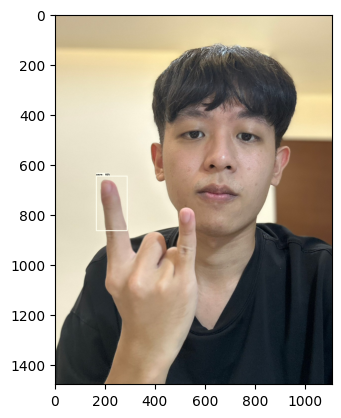

In [40]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [41]:
 # !pip install opencv-python-headless

/bin/bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
bash: /home/chanyu/anaconda3/lib/libtinfo.so.6: no version information available (required

In [44]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')